In [1]:
import pandas as pd

In [2]:
import os

In [3]:
file_prefix = "../English/Anxiety_eng/"
anxiety_list = os.listdir(file_prefix)

In [4]:
data = pd.read_csv(file_prefix + anxiety_list[0])
for file_dir in anxiety_list[1:]:
    item = pd.read_csv(file_prefix + file_dir)
    data = pd.concat([data, item], ignore_index=True)

In [5]:
data

,class,tweet_id,day,time,tweet,tweet_favorite_count,tweet_retweet_count,tweet_source,user_id,user_followers_count,user_friends_count,user_listed_count,user_statuses_count
0,ANXIETY,1527585317074927616,2022-05-20,09:41:35,"""Hey guys you can probably tell that Im not ac...",3,0,Twitter for iPhone,1432262525177892873,1897,3034,7,3922
1,ANXIETY,1524547507120111616,2022-05-12,00:30:25,"""SORRY DREAM AND SAPNAP KISSED""",5,0,Twitter for iPhone,1432262525177892873,1897,3034,7,3922
2,ANXIETY,1520696099383971841,2022-05-01,09:26:17,"""@USER No way thats not even possible how can ...",0,0,Twitter for iPhone,1432262525177892873,1897,3034,7,3922
3,ANXIETY,1520198976087400448,2022-04-30,00:30:54,"""@USER its a lounge""",1,0,Twitter for iPhone,1432262525177892873,1897,3034,7,3922
4,ANXIETY,1518509875432943622,2022-04-25,08:39:01,"""@USER They are keeping me going""",0,0,Twitter for iPhone,1432262525177892873,1897,3034,7,3922
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195939,ANXIETY,1206854719563534336,2019-12-17,08:32:42,"""Our boys never stop surprising us with their ...",2,1,Twitter Web App,95979229,158,173,2,4827
195940,ANXIETY,1206545540143562753,2019-12-16,12:04:07,"""@USER @USER 😂Here's hoping""",0,0,Twitter Web App,95979229,158,173,2,4827
195941,ANXIETY,1206323428128698368,2019-12-15,21:21:32,"""@USER Well done, I've got that 7th feeling, l...",2,0,Twitter Web App,95979229,158,173,2,4827
195942,ANXIETY,1204138454394843138,2019-12-09,20:39:13,"""#XFactorTheBand girl and boy band to compete ...",3,0,Twitter Web App,95979229,158,173,2,4827


In [43]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from string import punctuation
import matplotlib.pyplot as plt

In [44]:
# Define the list of punctuation marks to remove
remove_punctuation = list(punctuation)
remove_punctuation.extend(["@user", "user", "httpurl", "``", "''", "'s", "n't", "'m", "'re", "'ve", "'ll", "'d"])

# Convert all tweets to lowercase and remove punctuation
posts = [tweet.lower() for tweet in data['tweet']]

# Tokenize the tweets into individual words
tweets_tokenized = [nltk.word_tokenize(post) for post in posts]

# Remove stop words and punctuation from the list of words
stop_words = set(stopwords.words('english'))
tweets_cleaned = [[word for word in tweet if word not in stop_words and word not in remove_punctuation] for tweet in tweets_tokenized]

In [47]:
word_counts = Counter(word for tweet in tweets_cleaned for word in tweet)
most_common_ten = word_counts.most_common(10)


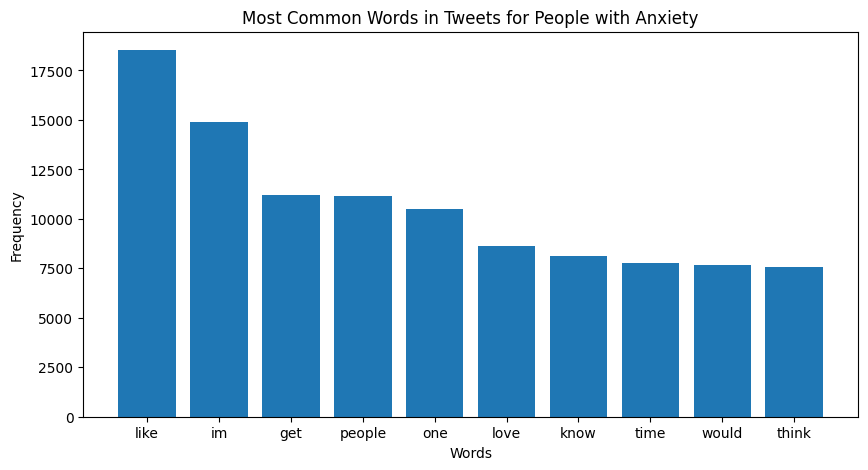

In [56]:
# Extract the words and frequencies
x_words = [word for word, freq in most_common_ten]
y_frequencies = [freq for word, freq in most_common_ten]

# Create a bar chart of the most common words and their frequencies
fig = plt.figure(figsize=(10, 5))
plt.bar(x_words, y_frequencies)
plt.title('Most Common Words in Tweets for People with Anxiety')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

fig.savefig('../graphs/anxiety_most_common_words.png', transparent=True)